# Lab notebook: the Mike Rayko's genome
by Polina Guseva and Anna

## downloads

### data

In [ ]:
# raw data from 23andMe
! gdown 1ZQAaSFwqNf2fyBoxdsmBxOaRfqcIbY0U
! mv SNP_raw_v4_Full_20170514175358.txt misha_raw_full.txt

Downloading...
From: https://drive.google.com/uc?id=1ZQAaSFwqNf2fyBoxdsmBxOaRfqcIbY0U
To: /content/SNP_raw_v4_Full_20170514175358.txt
100% 15.7M/15.7M [00:00<00:00, 116MB/s]


In [ ]:
# ClinVar database with ClinVar variants
! wget https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh37/clinvar.vcf.gz
! gzip -d /content/clinvar.vcf.gz

--2023-02-18 17:38:11--  https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh37/clinvar.vcf.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 165.112.9.229
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77917714 (74M) [application/x-gzip]
Saving to: ‘clinvar.vcf.gz’

clinvar.vcf.gz      100%[===================>]  74.31M  92.3MB/s    in 0.8s    

2023-02-18 17:38:15 (92.3 MB/s) - ‘clinvar.vcf.gz’ saved [77917714/77917714]



In [ ]:
# to allow downloading of big files 
! pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# VEP output
! gdown 1dzyAhd_2Bnu-SnRweGJOm1g2k41uQ0wN

Downloading...
From: https://drive.google.com/uc?id=1dzyAhd_2Bnu-SnRweGJOm1g2k41uQ0wN
To: /content/snp_clean_vep_output.txt
100% 134M/134M [00:01<00:00, 128MB/s]


### programmes

In [ ]:
# plink
! wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20230116.zip
! unzip plink_linux_x86_64_20230116.zip

--2023-02-18 17:38:26--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20230116.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.173.64, 52.217.203.120, 52.216.219.200, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.173.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8953489 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20230116.zip’

plink_linux_x86_64_ 100%[===================>]   8.54M  --.-KB/s    in 0.1s    

2023-02-18 17:38:26 (82.9 MB/s) - ‘plink_linux_x86_64_20230116.zip’ saved [8953489/8953489]

Archive:  plink_linux_x86_64_20230116.zip
  inflating: plink                   
  inflating: LICENSE                 
  inflating: toy.ped                 
  inflating: toy.map                 
  inflating: prettify                


In [ ]:
# snpEff
! wget https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip
! unzip snpEff_latest_core.zip

--2023-02-18 17:38:26--  https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip
Resolving snpeff.blob.core.windows.net (snpeff.blob.core.windows.net)... 52.239.234.228
Connecting to snpeff.blob.core.windows.net (snpeff.blob.core.windows.net)|52.239.234.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67191760 (64M) [application/zip]
Saving to: ‘snpEff_latest_core.zip’

snpEff_latest_core. 100%[===================>]  64.08M  31.3MB/s    in 2.0s    

2023-02-18 17:38:29 (31.3 MB/s) - ‘snpEff_latest_core.zip’ saved [67191760/67191760]

Archive:  snpEff_latest_core.zip
   creating: snpEff/
  inflating: snpEff/LICENSE.md       
  inflating: snpEff/snpEff.jar       
  inflating: snpEff/SnpSift.jar      
   creating: snpEff/galaxy/
  inflating: snpEff/galaxy/snpSift_int.xml  
   creating: snpEff/galaxy/tool-data/
  inflating: snpEff/galaxy/tool-data/snpEff_genomes.loc  
  inflating: snpEff/galaxy/tool-data/snpEff_genomes.loc.sample  
  inflating: snp

## let's code

### File conversion 

In [ ]:
# txt to vcf
! ./plink --23file /content/misha_raw_full.txt --recode vcf --out snps_clean --output-chr MT --snps-only just-acgt

PLINK v1.90b7 64-bit (16 Jan 2023)             www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snps_clean.log.
Options in effect:
  --23file /content/misha_raw_full.txt
  --out snps_clean
  --output-chr MT
  --recode vcf
  --snps-only just-acgt

12985 MB RAM detected; reserving 6492 MB for main workspace.
--23file: snps_clean-temporary.bed + snps_clean-temporary.bim +
snps_clean-temporary.fam written.
15125 variants with indel calls present.  '--snps-only no-DI' or
--list-23-indels may be useful here.
Inferred sex: male.
595401 out of 610526 variants loaded from .bim file.
1 person (1 male, 0 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1 founder and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%2

### Origins, haplogroups

1.   for mtDNA - https://dna.jameslick.com/mthap/
2.   For the Y chromosome - https://ytree.morleydna.com/extractFromAutosomal



#### for mtDNA

Markers found (shown as differences to rCRS):

HVR2: 152C 263G
CR: 750G 1438G 4769G 8860G
HVR1:

IMPORTANT NOTE: The above marker list is almost certainly incomplete due to limitations of genotyping technology and is not comparable to mtDNA sequencing results. It should not be used with services or tools that expect sequencing results, such as mitosearch.


Best mtDNA Haplogroup Matches:

1) H(T152C)

Defining Markers for haplogroup H(T152C):
HVR2: 152C 263G
CR: 750G 1438G 4769G 8860G 15326G
HVR1:

Marker path from rCRS to haplogroup H(T152C):
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 152C ⇨ H(T152C)

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
Untested(1): 15326


2) H1(T152C)

Defining Markers for haplogroup H1(T152C):
HVR2: 152C 263G
CR: 750G 1438G 3010A 4769G 8860G 15326G
HVR1:

Marker path from rCRS to haplogroup H1(T152C):
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 3010A ⇨ H1 ⇨ 152C ⇨ H1(T152C)

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
No-Calls(1): 3010A
Untested(1): 15326


3) H

Defining Markers for haplogroup H:
HVR2: 263G
CR: 750G 1438G 4769G 8860G 15326G
HVR1:

Marker path from rCRS to haplogroup H (plus extra markers):
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 152C

Imperfect Match. Your results contained differences with this haplogroup:
Matches(5): 263G 750G 1438G 4769G 8860G
Extras(1): 152C
Untested(1): 15326


3) H16(T152C)

Defining Markers for haplogroup H16(T152C):
HVR2: 152C 263G
CR: 750G 1438G 4769G 8860G 10394T 15326G
HVR1:

Marker path from rCRS to haplogroup H16(T152C):
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 10394T ⇨ H16 ⇨ 152C ⇨ H16(T152C)

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
Mismatches(1): 10394C
Untested(1): 15326


3) H69

Defining Markers for haplogroup H69:
HVR2: 152C 263G
CR: 750G 1438G 4646C 4769G 8860G 15326G
HVR1:

Marker path from rCRS to haplogroup H69:
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 152C ⇨ H(T152C) ⇨ 4646C ⇨ H69

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
Mismatches(1): 4646T
Untested(1): 15326


3) H52

Defining Markers for haplogroup H52:
HVR2: 152C 263G
CR: 750G 1438G 4769G 8860G 14220G 15326G
HVR1:

Marker path from rCRS to haplogroup H52:
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 152C ⇨ H(T152C) ⇨ 14220G ⇨ H52

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
Mismatches(1): 14220A
Untested(1): 15326


3) H3(T152C)

Defining Markers for haplogroup H3(T152C):
HVR2: 152C 263G
CR: 750G 1438G 4769G 6776C 8860G 15326G
HVR1:

Marker path from rCRS to haplogroup H3(T152C):
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 6776C ⇨ H3 ⇨ 152C ⇨ H3(T152C)

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
Mismatches(1): 6776T
Untested(1): 15326


3) H9

Defining Markers for haplogroup H9:
HVR2: 152C 263G
CR: 750G 1438G 4769G 8860G 13020C 15326G
HVR1:

Marker path from rCRS to haplogroup H9:
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 152C ⇨ H(T152C) ⇨ 13020C ⇨ H9

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
Mismatches(1): 13020T
Untested(1): 15326


3) H46

Defining Markers for haplogroup H46:
HVR2: 152C 263G
CR: 750G 1438G 2772T 4769G 8860G 15326G
HVR1:

Marker path from rCRS to haplogroup H46:
H2a2a1(rCRS) ⇨ 263G ⇨ H2a2a ⇨ 8860G 15326G ⇨ H2a2 ⇨ 750G ⇨ H2a ⇨ 4769G ⇨ H2 ⇨ 1438G ⇨ H ⇨ 152C ⇨ H(T152C) ⇨ 2772T ⇨ H46

Imperfect Match. Your results contained differences with this haplogroup:
Matches(6): 152C 263G 750G 1438G 4769G 8860G
Mismatches(1): 2772C
Untested(1): 15326

#### Y male dominance

Your data has:
63 Y-DNA position(s) lacking mutations recognised by the genetic genealogy community. These Y-DNA positions may not be very useful.
166 recognised mutation(s) with positive calls.
733 recognised mutation(s) with negative calls.
1086 recognised mutation(s) with no-calls.

Most likely:
R1a1a ;
R1a-L168 (R1a-M17, R1a-M198)

These are the most likely classifications for your Y-SNP data: 

* R1a1a [R1a-L168 (R1a-M17, R1a-M198)]
* M3 [M-P117 (M-P118)]
* K [K-PF5504 (K-PF5493, K-PF5480)]
* R1b1a2a1a2a1b3~2 [R1b-L421 (R1b-L433, R1b-L88)]
* N1a [N-M96 (N-CTS7095, N-P189)]

### Annotation - sex and eye colour

#### sex

In [ ]:
# get a glimpse at our data
! cat /content/misha_raw_full.txt | head -n 25

# This data file generated by 23andMe at: Sun May 14 17:53:58 2017
#
# This file contains raw genotype data, including data that is not used in 23andMe reports.
# This data has undergone a general quality review however only a subset of markers have been 
# individually validated for accuracy. As such, this data is suitable only for research, 
# educational, and informational use and not for medical or other use.
# 
# Below is a text version of your data.  Fields are TAB-separated
# Each line corresponds to a single SNP.  For each SNP, we provide its identifier 
# (an rsid or an internal id), its location on the reference human genome, and the 
# genotype call oriented with respect to the plus strand on the human reference sequence.
# We are using reference human assembly build 37 (also known as Annotation Release 104).
# Note that it is possible that data downloaded at different times may be different due to ongoing 
# improvements in our ability to call genotypes. More information ab

In [ ]:
# let's transport our raw data to python cos python rocks
import numpy as np
import pandas as pd

df_list = []

with open('/content/misha_raw_full.txt') as misha_raw:
  for i in misha_raw.readlines():
    if not i.startswith('#'):
      df_list.append(i.split())

df = pd.DataFrame(df_list, 
                  columns=['rsid', 'chromosome', 'position', 'genotype'])

In [ ]:
# what kinds of chromosomes have we got?
df.chromosome.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X',
       'Y', 'MT'], dtype=object)

In [ ]:
amount_X = list(df.chromosome.unique()).count('X')

print(f'The Y chromosome is {("absent", "present")["Y" in df.chromosome.unique()]}')
print(f'There is/are {amount_X} X chromosome/s\n')

print(f'The person is {("female", "male")[amount_X == 1 and "Y" in df.chromosome.unique()]}')

The Y chromosome is present
There is/are 1 X chromosome/s

The person is male


#### eye colour

The siggnificant genes for eye colour are taken from Hart *et al.* 2013 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3694299/

In [ ]:
# let's check alleles associated with eye and skin colour
list_eye_genes = 'rs12896399 rs12913832 rs1545397 rs16891982 rs1426654 rs885479 rs6119471 rs12203592'.split()

df[df.rsid.apply(lambda x: x in list_eye_genes)]

,rsid,chromosome,position,genotype
175251,rs16891982,5,33951693,CG
203094,rs12203592,6,396321,CT
461363,rs12896399,14,92773663,GG
465983,rs12913832,15,28365618,AG
470206,rs1426654,15,48426484,AA
502904,rs885479,16,89986154,GG


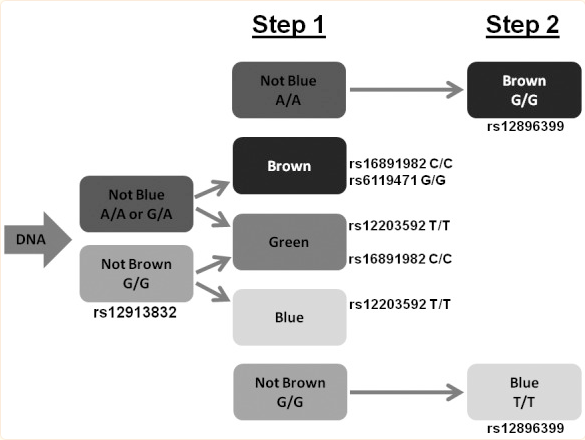

*   Misha got AG (aka G/A) in rs12913832 -> his eyes are Not Blue (Brown or Green)
*   no information about rs6119471
*   rs16891982 is CG -> nothing changes (brown or green)
*   rs12203592 is CT -> could be green
*   rs6119471 is not present


The conclusion: brown plus green. The proof is attached


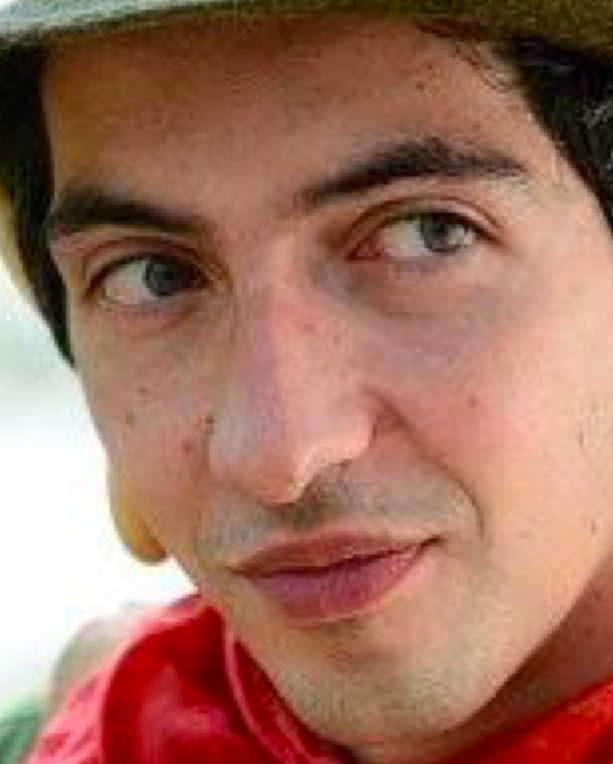

### Annotation of all SNPs, selection of clinically relevant ones

#### The variant with SnpEff/SnpSift

In [ ]:
! java -jar snpEff/snpEff.jar GRCh37.75 snps_clean.vcf  > snps_snpeff.vcf

00:00:00 ERROR while connecting to https://snpeff.blob.core.windows.net/databases/v5_1/snpEff_v5_1_GRCh37.75.zip


In [ ]:
! java -jar snpEff/SnpSift.jar annotate clinvar.vcf snps_clean.vcf > snps_clean_snpsift_clinvar.vcf

In [ ]:
! cat snps_clean_snpsift_clinvar.vcf | grep CLNDN | head

##INFO=<ID=CLNDNINCL,Number=.,Type=String,Description="For included Variant : ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB">
##INFO=<ID=CLNDN,Number=.,Type=String,Description="ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB">
1	2235672	rs2843159;673795	C	T	.	.	PR;AF_TGP=0.34984;ALLELEID=657402;CLNDISDB=MedGen:CN517202;CLNDN=not_provided;CLNHGVS=NC_000001.10:g.2235672C>T;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=SKI:6497;MC=SO:0001627|intron_variant;ORIGIN=1;RS=2843159	GT	0/1
1	3328659	rs2493292;227027	C	T	.	.	PR;AF_ESP=0.15231;AF_EXAC=0.13103;AF_TGP=0.10603;ALLELEID=228440;CLNDISDB=MONDO:MONDO:0014152,MedGen:C3809288,OMIM:615373|MedGen:CN169374;CLNDN=Left_ventricular_noncompaction_8|not_specified;CLNHGVS=NC_000001.10:g.3328659C>T;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Benign;CLNVC=si

In [ ]:
with open('snps_clean_snpsift_clinvar.vcf') as vcf:
   clinvar = vcf.readlines()

cut_line = sum(map(lambda x: x.startswith('#'), clinvar))

In [ ]:
clinvar_df = pd.DataFrame(clinvar[cut_line:])[0].str.split("\t", expand=True)
clinvar_df = clinvar_df.rename(columns=dict(zip(range(10), clinvar[cut_line-1].split('\t'))))
clinvar_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,FAM001_ID001\n
0,1,734462,rs12564807,A,.,.,.,PR,GT,0/0\n
1,1,752721,rs3131972,A,G,.,.,PR,GT,0/1\n
2,1,760998,rs148828841,C,.,.,.,PR,GT,0/0\n
3,1,776546,rs12124819,A,.,.,.,PR,GT,0/0\n
4,1,787173,rs115093905,N,.,.,.,PR,GT,./.\n


In [ ]:
! wget https://www.ebi.ac.uk/gwas/api/search/downloads/full

--2023-02-18 17:40:43--  https://www.ebi.ac.uk/gwas/api/search/downloads/full
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tsv]
Saving to: ‘full’

full                    [ <=>                ] 240.87M  4.31MB/s    in 5m 21s  

2023-02-18 17:46:04 (768 KB/s) - ‘full’ saved [252575208]



In [ ]:
! mv full full.tsv

In [ ]:
! cat full.tsv | head

DATE ADDED TO CATALOG	PUBMEDID	FIRST AUTHOR	DATE	JOURNAL	LINK	STUDY	DISEASE/TRAIT	INITIAL SAMPLE SIZE	REPLICATION SAMPLE SIZE	REGION	CHR_ID	CHR_POS	REPORTED GENE(S)	MAPPED_GENE	UPSTREAM_GENE_ID	DOWNSTREAM_GENE_ID	SNP_GENE_IDS	UPSTREAM_GENE_DISTANCE	DOWNSTREAM_GENE_DISTANCE	STRONGEST SNP-RISK ALLELE	SNPS	MERGED	SNP_ID_CURRENT	CONTEXT	INTERGENIC	RISK ALLELE FREQUENCY	P-VALUE	PVALUE_MLOG	P-VALUE (TEXT)	OR or BETA	95% CI (TEXT)	PLATFORM [SNPS PASSING QC]	CNV
2017-08-22	28448500	Graff M	2017-04-27	PLoS Genet	www.ncbi.nlm.nih.gov/pubmed/28448500	Genome-wide physical activity interactions in adiposity - A meta-analysis of 200,452 adults.	Waist-to-hip ratio adjusted for BMI in active individuals	1,957 African American women, 1,421 Filipino ancestry women, 305 Indian ancestry women, 65,539 European ancestry women, 1,206 African American men, 2,029 Indian ancestry men, 41,673 European ancestry men, 4,819 European ancestry individuals	4,807 African American women, 12,347 European ancestry women, 

In [ ]:
! java -jar snpEff/SnpSift.jar gwasCat -db full.tsv snps_clean.vcf > snps_clean_gwascat.vcf 

WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry chr:pos '17:61406404' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry RS number 'rs8068318' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry chr:pos '19:11416088' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry RS number 'rs167479' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry chr:pos '22:29055682' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry RS number 'rs4823006' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry chr:pos '7:27119516' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry RS number 'rs6969780' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry chr:pos '7:151007754' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry RS number 'rs891511' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry chr:pos '12:50144031' already exists
WARNING_DUPLICATE_PRIMARY_KEY: GwasCatalog entry RS numbe

In [ ]:
! cat snps_clean_gwascat.vcf | head -n 45

##fileformat=VCFv4.2
##fileDate=20230218
##source=PLINKv1.90
##contig=<ID=1,length=249218993>
##contig=<ID=2,length=243048761>
##contig=<ID=3,length=197833759>
##contig=<ID=4,length=190939666>
##contig=<ID=5,length=180696890>
##contig=<ID=6,length=170919471>
##contig=<ID=7,length=159119221>
##contig=<ID=8,length=146296415>
##contig=<ID=9,length=141066492>
##contig=<ID=10,length=135523247>
##contig=<ID=11,length=134940417>
##contig=<ID=12,length=133838354>
##contig=<ID=13,length=115103151>
##contig=<ID=14,length=107285438>
##contig=<ID=15,length=102398632>
##contig=<ID=16,length=90163276>
##contig=<ID=17,length=81047709>
##contig=<ID=18,length=78015181>
##contig=<ID=19,length=59094137>
##contig=<ID=20,length=62960293>
##contig=<ID=21,length=48100156>
##contig=<ID=22,length=51214250>
##contig=<ID=X,length=155233099>
##contig=<ID=Y,length=59032810>
##contig=<ID=MT,length=16548>
##INFO=<ID=PR,Number=0,Type=Flag,Description="Provisional reference allele, may not be based on real reference g

#### VEP (Variant Effect Predictor)

In [ ]:
! awk '$32 != "-"' snp_clean_vep_output.txt | grep risk_factor | cut -f 1-6 | sort | uniq

i3000469	2:138759649-138759649	T	missense_variant	MODERATE	HNMT
i3000469	2:138759649-138759649	T	non_coding_transcript_exon_variant	MODIFIER	HNMT
i6007787	2:234183368-234183368	G	3_prime_UTR_variant,NMD_transcript_variant	MODIFIER	ATG16L1
i6007787	2:234183368-234183368	G	downstream_gene_variant	MODIFIER	ATG16L1
i6007787	2:234183368-234183368	G	missense_variant	MODERATE	ATG16L1
i6007787	2:234183368-234183368	G	non_coding_transcript_exon_variant	MODIFIER	ATG16L1
i6007787	2:234183368-234183368	G	upstream_gene_variant	MODIFIER	ATG16L1
i6007787	2:234183368-234183368	G	upstream_gene_variant	MODIFIER	SCARNA5
i6058143	1:161479745-161479745	G	3_prime_UTR_variant,NMD_transcript_variant	MODIFIER	FCGR2A
i6058143	1:161479745-161479745	G	downstream_gene_variant	MODIFIER	FCGR2A
i6058143	1:161479745-161479745	G	missense_variant	MODERATE	FCGR2A
i6058143	1:161479745-161479745	G	missense_variant,NMD_transcript_variant	MODERATE	FCGR2A
i6058143	1:161479745-161479745	G	non_coding_transcript_exon_variant	MOD

In [ ]:
df_vep = pd.read_table('/content/snp_clean_vep_output.txt')
df_vep.head()

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
0,rs3131972,1:752721-752721,G,upstream_gene_variant,MODIFIER,FAM87B,ENSG00000177757,Transcript,ENST00000326734.1,lincRNA,...,0.6534,-,-,-,-,-,-,-,-,-
1,rs3131972,1:752721-752721,G,"intron_variant,non_coding_transcript_variant",MODIFIER,RP11-206L10.10,ENSG00000240453,Transcript,ENST00000435300.1,processed_transcript,...,0.6534,-,-,-,-,-,-,-,-,-
2,rs3131972,1:752721-752721,G,regulatory_region_variant,MODIFIER,-,-,RegulatoryFeature,ENSR00000918393,promoter,...,0.6534,-,-,-,-,-,-,-,-,-
3,rs3131972,1:752721-752721,G,TF_binding_site_variant,MODIFIER,-,-,MotifFeature,ENSM00800836535,-,...,0.6534,-,-,-,-,ENSPFM0577,8,N,0.006,TEAD4::SOX6
4,rs11240777,1:798959-798959,G,downstream_gene_variant,MODIFIER,FAM41C,ENSG00000230368,Transcript,ENST00000427857.1,lincRNA,...,-,-,-,-,-,-,-,-,-,-


<ipython-input-25-661b5badd926>:24: UserWarning: The handle <matplotlib.patches.Wedge object at 0x7faafaf29be0> has a label of '_risk_factor: 0.02%' which cannot be automatically added to the legend.
  plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.4, 1))
<ipython-input-25-661b5badd926>:24: UserWarning: The handle <matplotlib.patches.Wedge object at 0x7faafb05f2b0> has a label of '_other: 0.12%' which cannot be automatically added to the legend.
  plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.4, 1))


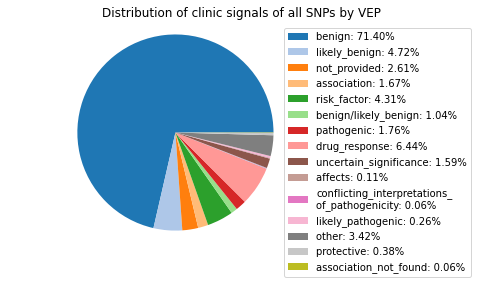

In [ ]:
import itertools
from collections import Counter

d = np.array(df_vep.CLIN_SIG).flatten()
d = np.array(list(filter(lambda x: len(x) > 1, d)))
d = list(itertools.chain(*[i.split(',') for i in d]))

word_count = Counter(d)
freqs = list(word_count.values())
labels = list(word_count.keys())

from textwrap import fill
labels = [fill(l, 28) for l in labels]

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ListedColormap(plt.cm.tab20.colors)

plt.pie(freqs, labels=labels, autopct='', textprops={'color': 'white'}, colors=colors.colors)
plt.axis('equal')

legend_labels = [f"{label}: {100 * freq / sum(freqs):.2f}%" for label, freq in zip(labels, freqs)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Distribution of clinic signals of all SNPs by VEP', x=0.7)
plt.savefig('vep_CLN.pdf', bbox_inches='tight')

In [ ]:
# let's have a look what effect could be in the clinic significance column
set(labels)

{'_other',
 '_risk_factor',
 'affects',
 'association',
 'association_not_found',
 'benign',
 'benign/likely_benign',
 'conflicting_interpretations_\nof_pathogenicity',
 'drug_response',
 'likely_benign',
 'likely_pathogenic',
 'not_provided',
 'other',
 'pathogenic',
 'protective',
 'risk_factor',
 'uncertain_significance'}

In [ ]:
cleaner = ['_risk_factor' in i for i in df_vep.CLIN_SIG]

df_vep[cleaner]

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
37499,rs460897,1:196716319-196716319,T,missense_variant,MODERATE,CFH,ENSG00000000971,Transcript,ENST00000367429.4,protein_coding,...,-,"pathogenic,_risk_factor","0,0,0,1","1,1,1,1","20301541,23251215,17314151,16470555,17076561,9...",-,-,-,-,-
37500,rs460897,1:196716319-196716319,T,non_coding_transcript_exon_variant,MODIFIER,CFH,ENSG00000000971,Transcript,ENST00000466229.1,retained_intron,...,-,"pathogenic,_risk_factor","0,0,0,1","1,1,1,1","20301541,23251215,17314151,16470555,17076561,9...",-,-,-,-,-


In [ ]:
cleaner = ['risk_factor' in i for i in df_vep.CLIN_SIG]

df_vep[cleaner]

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
13362,rs5174,1:53712727-53712727,T,"missense_variant,splice_region_variant",MODERATE,LRP8,ENSG00000157193,Transcript,ENST00000306052.6,protein_coding,...,0.1444,risk_factor,"0,0,1","1,1,1","16642433,21738487,31397093,22938532,17847002,1...",-,-,-,-,-
13363,rs5174,1:53712727-53712727,T,"missense_variant,splice_region_variant",MODERATE,LRP8,ENSG00000157193,Transcript,ENST00000347547.2,protein_coding,...,0.1444,risk_factor,"0,0,1","1,1,1","16642433,21738487,31397093,22938532,17847002,1...",-,-,-,-,-
13364,rs5174,1:53712727-53712727,T,"missense_variant,splice_region_variant",MODERATE,LRP8,ENSG00000157193,Transcript,ENST00000354412.3,protein_coding,...,0.1444,risk_factor,"0,0,1","1,1,1","16642433,21738487,31397093,22938532,17847002,1...",-,-,-,-,-
13365,rs5174,1:53712727-53712727,T,"missense_variant,splice_region_variant",MODERATE,LRP8,ENSG00000157193,Transcript,ENST00000371454.2,protein_coding,...,0.1444,risk_factor,"0,0,1","1,1,1","16642433,21738487,31397093,22938532,17847002,1...",-,-,-,-,-
13366,rs5174,1:53712727-53712727,T,downstream_gene_variant,MODIFIER,RP5-1024G6.5,ENSG00000226754,Transcript,ENST00000458151.1,antisense,...,0.1444,risk_factor,"0,0,1","1,1,1","16642433,21738487,31397093,22938532,17847002,1...",-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620486,rs1801968,9:132580901-132580901,G,missense_variant,MODERATE,TOR1A,ENSG00000136827,Transcript,ENST00000351698.4,protein_coding,...,0.0837,"risk_factor,benign","0,0,1,1","1,1,1,1","20669276,23460578,28081261,30643666,25741868,9...",-,-,-,-,-
620487,rs1801968,9:132580901-132580901,G,downstream_gene_variant,MODIFIER,TOR1A,ENSG00000136827,Transcript,ENST00000473084.1,processed_transcript,...,0.0837,"risk_factor,benign","0,0,1,1","1,1,1,1","20669276,23460578,28081261,30643666,25741868,9...",-,-,-,-,-
620488,rs1801968,9:132580901-132580901,G,non_coding_transcript_exon_variant,MODIFIER,TOR1A,ENSG00000136827,Transcript,ENST00000473604.2,processed_transcript,...,0.0837,"risk_factor,benign","0,0,1,1","1,1,1,1","20669276,23460578,28081261,30643666,25741868,9...",-,-,-,-,-
620489,rs1801968,9:132580901-132580901,G,non_coding_transcript_exon_variant,MODIFIER,TOR1A,ENSG00000136827,Transcript,ENST00000474192.1,processed_transcript,...,0.0837,"risk_factor,benign","0,0,1,1","1,1,1,1","20669276,23460578,28081261,30643666,25741868,9...",-,-,-,-,-


In [ ]:
# which genes got missense variant?
df_vep_clean = df_vep[cleaner]
df_vep_clean = df_vep_clean.query("Consequence == 'missense_variant'")
df_vep_clean['#Uploaded_variation'].unique()

array(['i6058143', 'rs1801274', 'rs460897', 'rs699', 'rs6265',
       'rs1169288', 'rs1801275', 'rs61747071', 'rs12150220', 'rs6504649',
       'i3000469', 'rs231775', 'i6007787', 'rs2241880', 'rs6280',
       'rs1049296', 'rs4961', 'rs1801394', 'rs4880', 'rs1801197',
       'rs13266634', 'i6059141', 'rs1801968'], dtype=object)

In [ ]:
# let's check nucleotides in alleles
df_vep[df_vep['#Uploaded_variation'] == 'rs4961']

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
425737,rs4961,4:2906707-2906707,T,missense_variant,MODERATE,ADD1,ENSG00000087274,Transcript,ENST00000264758.7,protein_coding,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425738,rs4961,4:2906707-2906707,T,missense_variant,MODERATE,ADD1,ENSG00000087274,Transcript,ENST00000355842.3,protein_coding,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425739,rs4961,4:2906707-2906707,T,missense_variant,MODERATE,ADD1,ENSG00000087274,Transcript,ENST00000398123.2,protein_coding,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425740,rs4961,4:2906707-2906707,T,missense_variant,MODERATE,ADD1,ENSG00000087274,Transcript,ENST00000398125.1,protein_coding,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425741,rs4961,4:2906707-2906707,T,missense_variant,MODERATE,ADD1,ENSG00000087274,Transcript,ENST00000398129.1,protein_coding,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425742,rs4961,4:2906707-2906707,T,missense_variant,MODERATE,ADD1,ENSG00000087274,Transcript,ENST00000446856.1,protein_coding,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425743,rs4961,4:2906707-2906707,T,non_coding_transcript_exon_variant,MODIFIER,ADD1,ENSG00000087274,Transcript,ENST00000503169.1,retained_intron,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425744,rs4961,4:2906707-2906707,T,missense_variant,MODERATE,ADD1,ENSG00000087274,Transcript,ENST00000503455.2,protein_coding,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425745,rs4961,4:2906707-2906707,T,downstream_gene_variant,MODIFIER,ADD1,ENSG00000087274,Transcript,ENST00000506157.1,retained_intron,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-
425746,rs4961,4:2906707-2906707,T,downstream_gene_variant,MODIFIER,ADD1,ENSG00000087274,Transcript,ENST00000508684.1,retained_intron,...,0.2085,"drug_response,risk_factor","0,0,1","1,1,1","27029813,19131662,19263529,19330901,19559392,1...",-,-,-,-,-


In [ ]:
# let's check the presence of some SNPs associated with longevity
r = 'rs2802292 rs1935949 rs3758391 rs5882 rs1042522 rs1800795 rs2811712 rs34516635 rs2542052 rs3803304 rs1061170 rs6873545 rs4590183'.split()

for i in r:
  print(i, r in df_vep['#Uploaded_variation'].unique())

<ipython-input-31-a53568234af6>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(i, r in df_vep['#Uploaded_variation'].unique())


rs2802292 False
rs1935949 False
rs3758391 False
rs5882 False
rs1042522 False
rs1800795 False
rs2811712 False
rs34516635 False
rs2542052 False
rs3803304 False
rs1061170 False
rs6873545 False
rs4590183 False
